In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.4.1

In [2]:
t = np.linspace(0, 2 * np.pi, 100)  

# equations
gamma1 = 3 * (1.5 * np.cos(t) + 1j * np.sin(t))
gamma2 = np.exp(1j * np.pi / 3) * (1 + np.cos(t) + 1.5j * np.sin(t) + 0.125 * (1 + 1.5j) * np.sin(3 * t)**2)

# Convert to real-valued 2D points
gamma1_points = np.column_stack((gamma1.real, gamma1.imag))
gamma2_points = np.column_stack((gamma2.real, gamma2.imag))

### 2.4.2 & 2.4.3 Implement Procrustes and Plot both curves

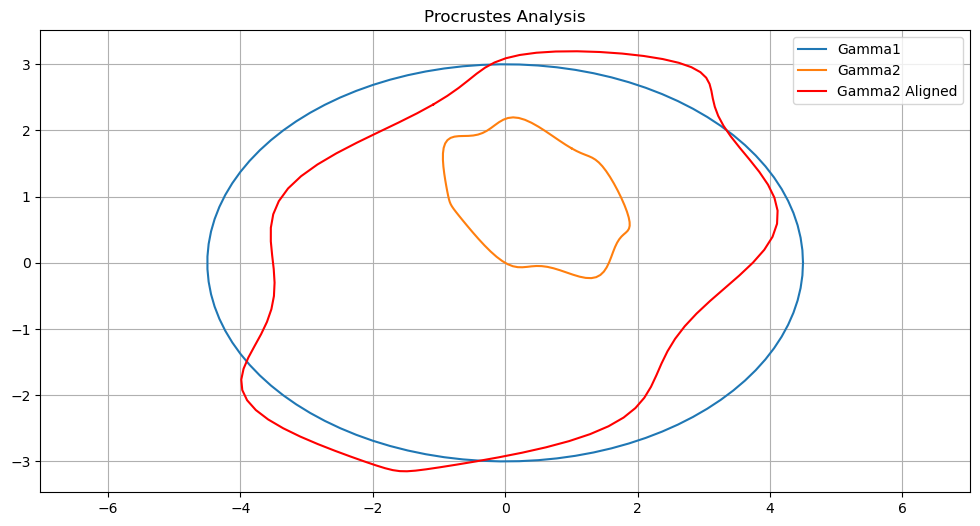

In [3]:
from scipy.linalg import svd

n = gamma1_points.shape[1]
mu_gamma1 = np.mean(gamma1_points, axis=0)
mu_gamma2 = np.mean(gamma2_points, axis=0)
gamma1_centered = gamma1_points - mu_gamma1
gamma2_centered = gamma2_points - mu_gamma2

R = np.dot(gamma1_centered.T, gamma2_centered)
U, S, Vt = svd(R)
Q = np.dot(U, Vt)  # Orthonormal matrix for rotation

sqf_gamma2 = np.sum(gamma2_centered**2)
a = np.sum(S) / sqf_gamma2  # Scaling factor

z = mu_gamma2 - np.dot(Q.T, mu_gamma1) / a  # Translation vector
gamma2_transformed = a * np.dot(gamma2_points - z, Q)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(gamma1_points[:, 0], gamma1_points[:, 1], label='Gamma1')
plt.plot(gamma2_points[:, 0], gamma2_points[:, 1], label='Gamma2')
plt.plot(gamma2_transformed[:, 0], gamma2_transformed[:, 1], 'r-', label='Gamma2 Aligned')
plt.legend(loc='best')
plt.title('Procrustes Analysis')
plt.axis('equal')
plt.grid(True)
plt.show()